In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding_errors='ignore')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df = df.iloc[:, :2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df = df.rename(columns={'v1':'target', 'v2':'text'})
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [8]:
df['target'] = lb.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isna().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

404

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5168, 2)

# EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


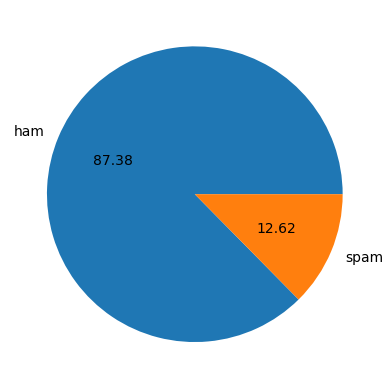

In [15]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f");

In [16]:
import nltk
from nltk.corpus import stopwords


In [17]:
df['num_char']= df['text'].apply(len)

In [18]:
df['num_words'] =df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df['num_sent'] =df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df.iloc[:, 2:].describe()

,num_char,num_words,num_sent
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#ham
df[df['target'] == 0].iloc[:, 2:].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
df[df['target'] == 1].iloc[:, 2:].describe()

,num_char,num_words,num_sent
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


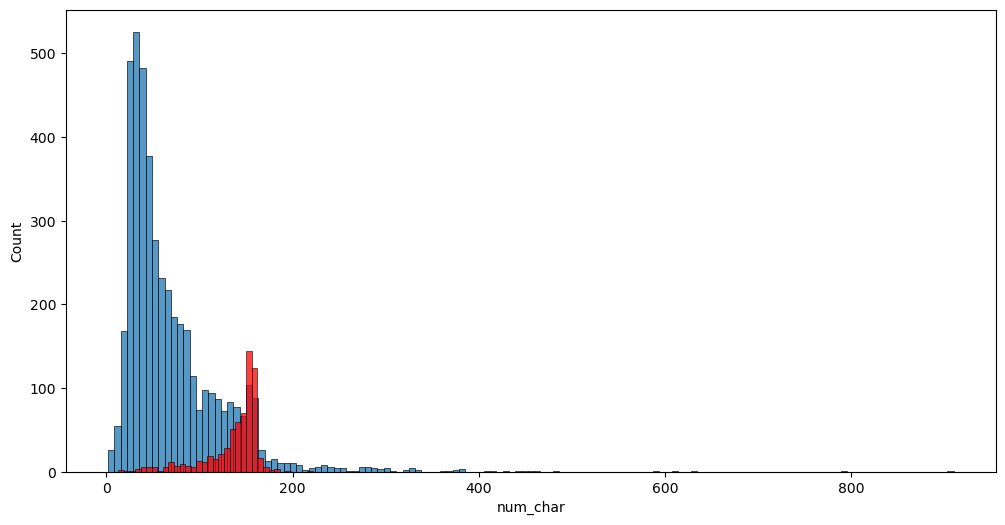

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color='r');

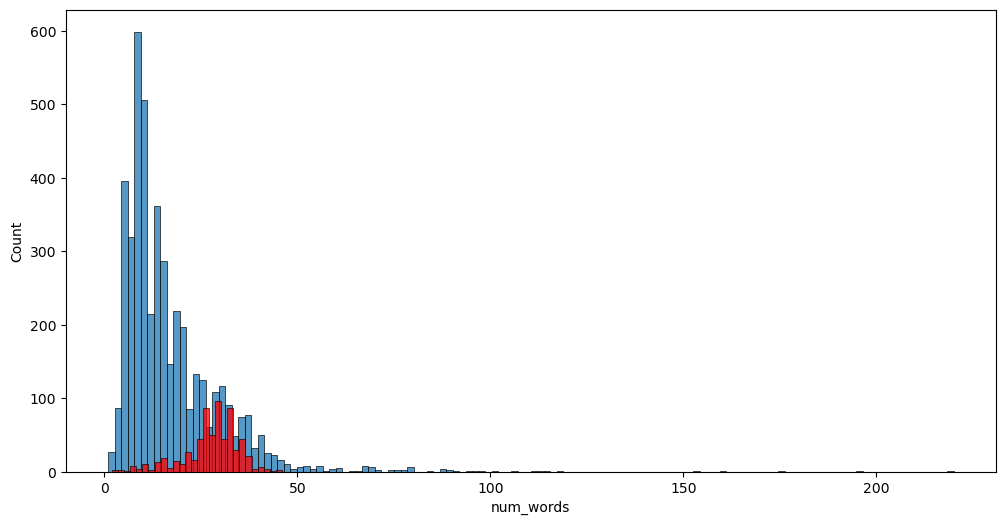

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='r');

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


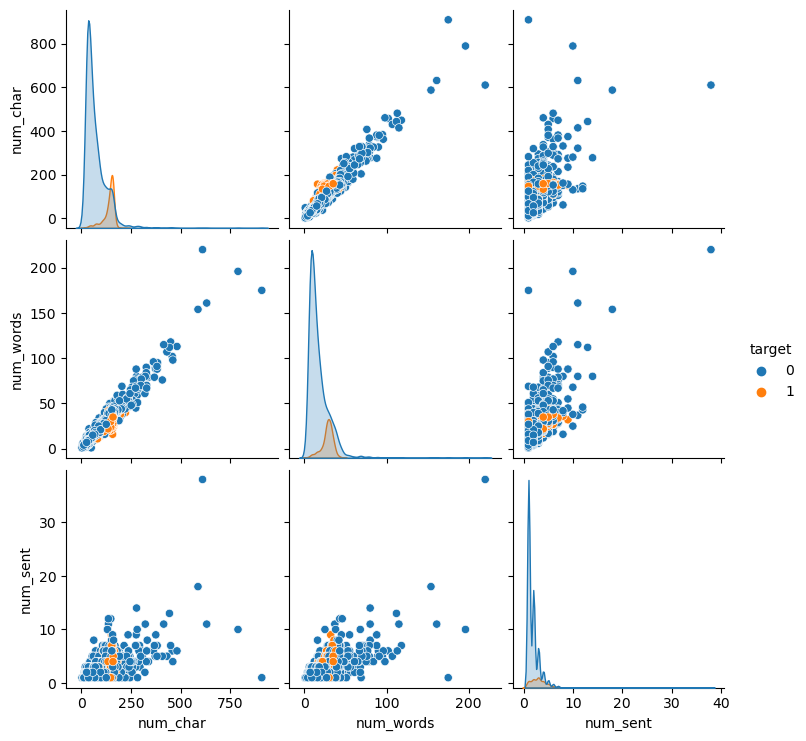

In [26]:
sns.pairplot(df, hue='target');

In [27]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


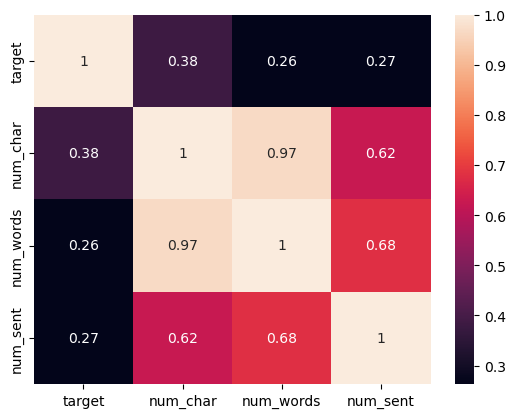

In [28]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

# Data Preprocessing

In [29]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
def transform_text(text):
    text = text.lower() 
    text = [word for word in nltk.word_tokenize(text) if word.isalnum()]
    text = ' '.join(text)
    text = [char for char in text.split() if char not in stopwords.words('english') and string.punctuation]
    text = [ps.stem(word) for word in text]
    
    return ' '.join(text)


In [31]:
df['transformed_text']=df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

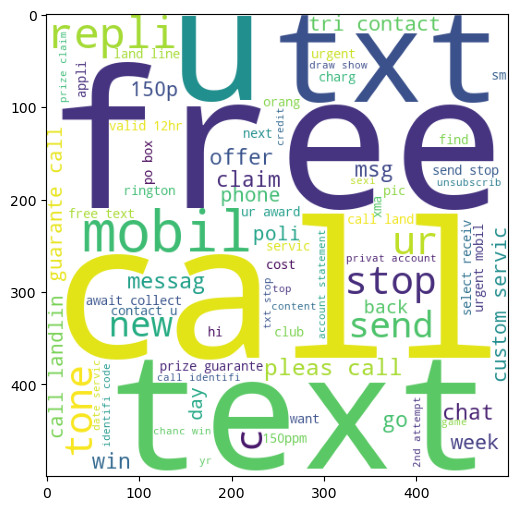

In [36]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc);

In [37]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

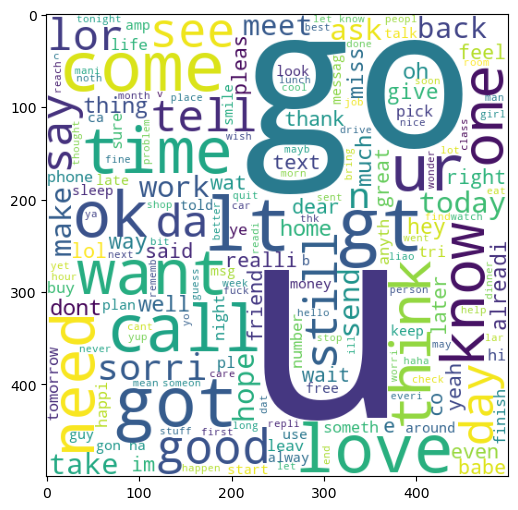

In [38]:
plt.figure(figsize=(10,6))
plt.imshow(ham_wc);

In [39]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [40]:
len(spam_corpus)

10106

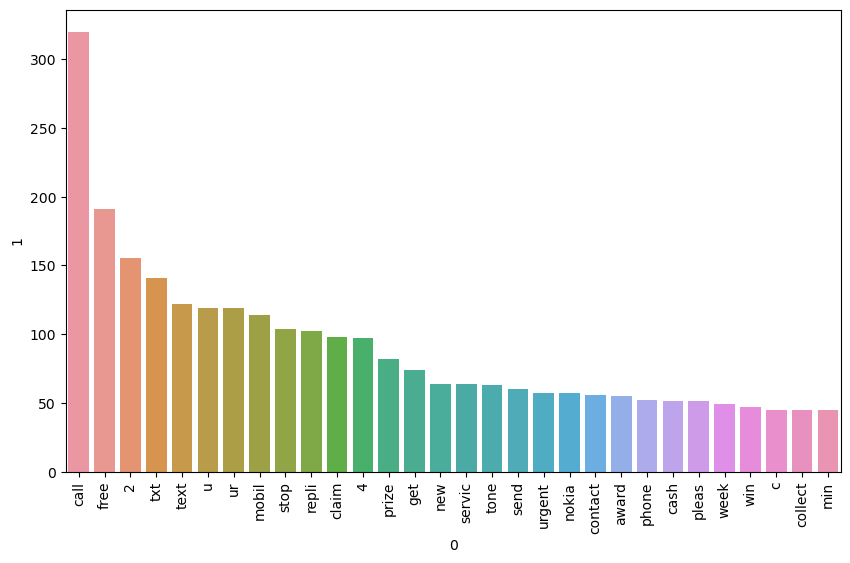

In [41]:
from collections import Counter

sc_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

plt.figure(figsize=(10,6))
sns.barplot(x = sc_df[0], y = sc_df[1])
plt.xticks(rotation='vertical');

In [42]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

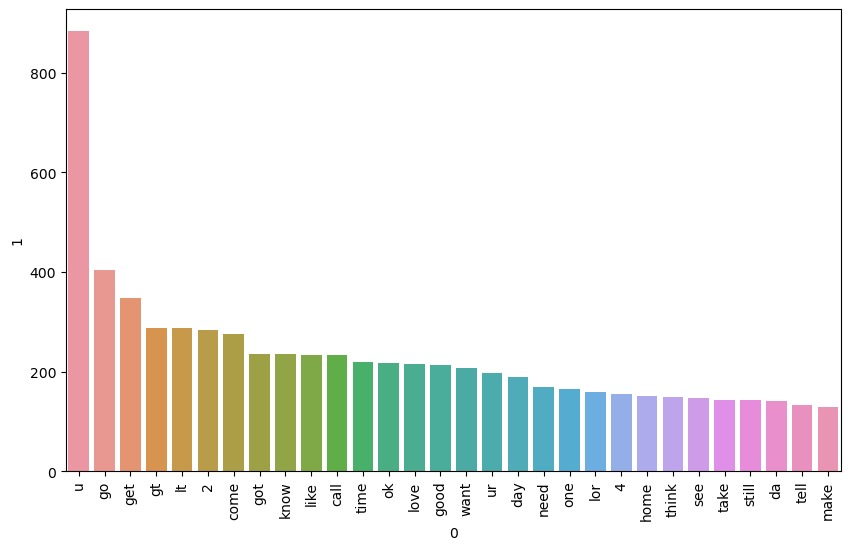

In [43]:
hc_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

plt.figure(figsize=(10,6))
sns.barplot(x = hc_df[0], y = hc_df[1])
plt.xticks(rotation='vertical');

# Model Building

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [45]:
x_cv = cv.fit_transform(df['transformed_text']).toarray()
x_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()

In [46]:
y = df['target'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.20, random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [52]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [53]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [55]:
lr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
adc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
bc = BaggingClassifier()
gbc = GradientBoostingClassifier()
nb = MultinomialNB()
xgb = XGBClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [56]:
classifiers = {'LogisticRegression':lr,
             'SVC':svc,
             'DecisionTreeClassifier':dtc,
             'AdaBoostClassifier':adc,
             "ExtraTreesClassifier":etc,
             'BaggingClassifier':bc,
             'GradientBoostingClassifier':gbc,
             'NaiveBayes':nb,
             'XGBClassifier':xgb,
             'KNeighborsClassifier':knc,
             'RandomForestClassifier':rfc}

In [57]:
def train_classifiers(classifier, x_train, x_test, y_train, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision   
    

In [58]:
train_classifiers(svc, x_train, x_test, y_train, y_test)

(0.9729206963249516, 0.991304347826087)

In [59]:
accuracy_scores = []
precision_scores = []

for name, clf in classifiers.items():
    
    accuracy, precision = train_classifiers(clf, x_train, x_test, y_train, y_test)
    
    print('For', name)
    print('Accuracy - ', accuracy)
    print('Precision - ', precision)
    print('*'*50)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

For LogisticRegression
Accuracy -  0.9506769825918762
Precision -  0.9787234042553191
**************************************************
For SVC
Accuracy -  0.9729206963249516
Precision -  0.991304347826087
**************************************************
For DecisionTreeClassifier
Accuracy -  0.9516441005802708
Precision -  0.837037037037037
**************************************************
For AdaBoostClassifier
Accuracy -  0.960348162475822
Precision -  0.9464285714285714
**************************************************
For ExtraTreesClassifier
Accuracy -  0.9738878143133463
Precision -  0.9672131147540983
**************************************************
For BaggingClassifier
Accuracy -  0.9564796905222437
Precision -  0.8809523809523809
**************************************************
For GradientBoostingClassifier
Accuracy -  0.9545454545454546
Precision -  0.9433962264150944
**************************************************
For NaiveBayes
Accuracy -  0.9700193423597679


In [60]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
7,NaiveBayes,0.970019,1.000000
9,KNeighborsClassifier,0.901354,1.000000
1,SVC,0.972921,0.991304
10,RandomForestClassifier,0.973888,0.983051
0,LogisticRegression,0.950677,0.978723
4,ExtraTreesClassifier,0.973888,0.967213
8,XGBClassifier,0.967118,0.949580
3,AdaBoostClassifier,0.960348,0.946429
6,GradientBoostingClassifier,0.954545,0.943396
5,BaggingClassifier,0.956480,0.880952


In [61]:
def prediction_func(input_sms):

    transformed_sms = transform_text(input_sms)
    vector_input = tfidf.transform([transformed_sms])
    result = mnb.predict(vector_input)[0]
    
    if result == 1:
        print()
        print("Spam")
    else:
        print()
        print("Not Spam")

In [62]:
input_sms = input('Enter the message :\n')

prediction_func(input_sms)

Enter the message :
CONGRATULATIONS!!!YOUR # WON TOYOTA AVANZA w/ 300 thou via electronic last Jan.24.2011.For details,please call now MANUEL ACOSTA of Phil. Info. Center on this #

Spam
